# Project objectives

The core of the project focused on model development and refinement. Various regression models, including Linear, Polynomial, Ridge, and Lasso, were built and trained on the prepared data, with the dataset being carefully split into training and testing sets. Extensive hyperparameter tuning was conducted, particularly for Ridge and Lasso models, utilizing techniques like GridSearchCV to optimize their performance. Finally, a thorough evaluation of all trained models was performed, where their predictive accuracy was assessed using metrics like Root Mean Squared Error (RMSE), and their performance was visually compared against actual values through various plots and charts to determine the most effective model for the given task. The overall purpose of this project was to develop and evaluate machine learning models for regression, specifically to predict house prices, by systematically preparing data, building diverse models, and optimizing their performance for accurate predictions.

# Import The Required Libraries

In [1]:
# Importing the warnings library to control warning messages
import warnings

# Ignoring all warnings to prevent them from showing up in the output
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries for data analysis and visualization
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import math  # Mathematical functions
import itertools  # Tools for iterators like combinations/permutations

# Visualization libraries
import seaborn as sns  # Statistical plots
import matplotlib.pylab as plt  # General plotting
%matplotlib inline

# Scikit-learn: preprocessing, modeling, evaluation
from sklearn.preprocessing import StandardScaler  # Feature scaling (standardization)
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.metrics import r2_score  # R-squared performance metric
from sklearn.preprocessing import PolynomialFeatures  # Generate polynomial features
from sklearn.metrics import mean_squared_error, make_scorer  # Error metrics
from sklearn.preprocessing import scale  # Scale data
from sklearn.preprocessing import MinMaxScaler  # Feature scaling (normalization)
from sklearn.feature_selection import SelectKBest, f_regression  # Feature selection
from sklearn.pipeline import Pipeline  # Combine steps into a pipeline
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.linear_model import RidgeCV, LassoCV  # Ridge and Lasso regression with CV

# Statistical functions
from scipy.stats import norm  # Normal distribution functions


# Reading and Understanding The Dataset

This section focuses on loading and gaining initial insights into the dataset. A dataset named house_price_regression_dataset.csv is read into a pandas DataFrame. The first five rows of this DataFrame are displayed to provide a quick preview of the data's structure and content. A concise summary of the DataFrame is then shown, including the data types of each column and the count of non-null values, which aids in identifying missing data. Finally, descriptive statistics are generated for the numerical columns, providing insights into the central tendency, dispersion, and shape of the data distribution. The numerical features are identified and displayed.

In [3]:
# Reading the dataset from a CSV file and loading it into a pandas DataFrame
df = pd.read_csv('/content/house_price_regression_dataset.csv')

# Displaying the first 5 rows of the dataset to get a preview of the data
df.head(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
# Displaying concise summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
# Using the describe() function to generate summary statistics of the dataset
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [6]:
numerical_features = df.select_dtypes(include=[np.number]).columns  # Select column names with numeric data types
numerical_features  # Display the list of numeric feature names


Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

The dataset does not have categorical features but only numerical features. So, one-hot encoding is not required in this case.

# Cleaning Dataset

This section details the steps taken to clean the dataset, specifically addressing missing and duplicate values, and handling outliers. A copy of the original DataFrame is created to preserve the original data.

In [7]:
df_cleaned = df.copy()

## Handling Missing Values

This subsection addresses the identification of missing values within the dataset. The total number of missing (null) values for each column is calculated and displayed. The output indicates that no missing values are present in any of the columns.

In [8]:
df_cleaned.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


## Handiling Duplicate Values

This subsection focuses on identifying and examining duplicate rows in the dataset. Duplicate rows are identified and stored in a new DataFrame. This new DataFrame is then displayed, revealing that no duplicate rows were found in the dataset.

In [9]:
duplicate_rows = df_cleaned[df_cleaned.duplicated()]  # Filter rows that are duplicates of previous rows
duplicate_rows  # Display the duplicated rows


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price


## Handling Outliers

This subsection involves identifying numerical features and visualizing potential outliers using box plots. Numerical columns are identified and stored. A grid of subplots is then created, with the number of rows and columns calculated dynamically based on the count of numerical features. For each numerical feature, a box plot is generated, which visually represents the distribution of data and highlights any outliers. Titles are set for each subplot, and x-axis labels are removed for clarity. Finally, grid lines are enabled on each subplot, and the overall layout is adjusted for better presentation before the plots are displayed.

In [10]:
numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns  # Get names of numeric columns in df_cleaned
numerical_features  # Display the numeric feature names


Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

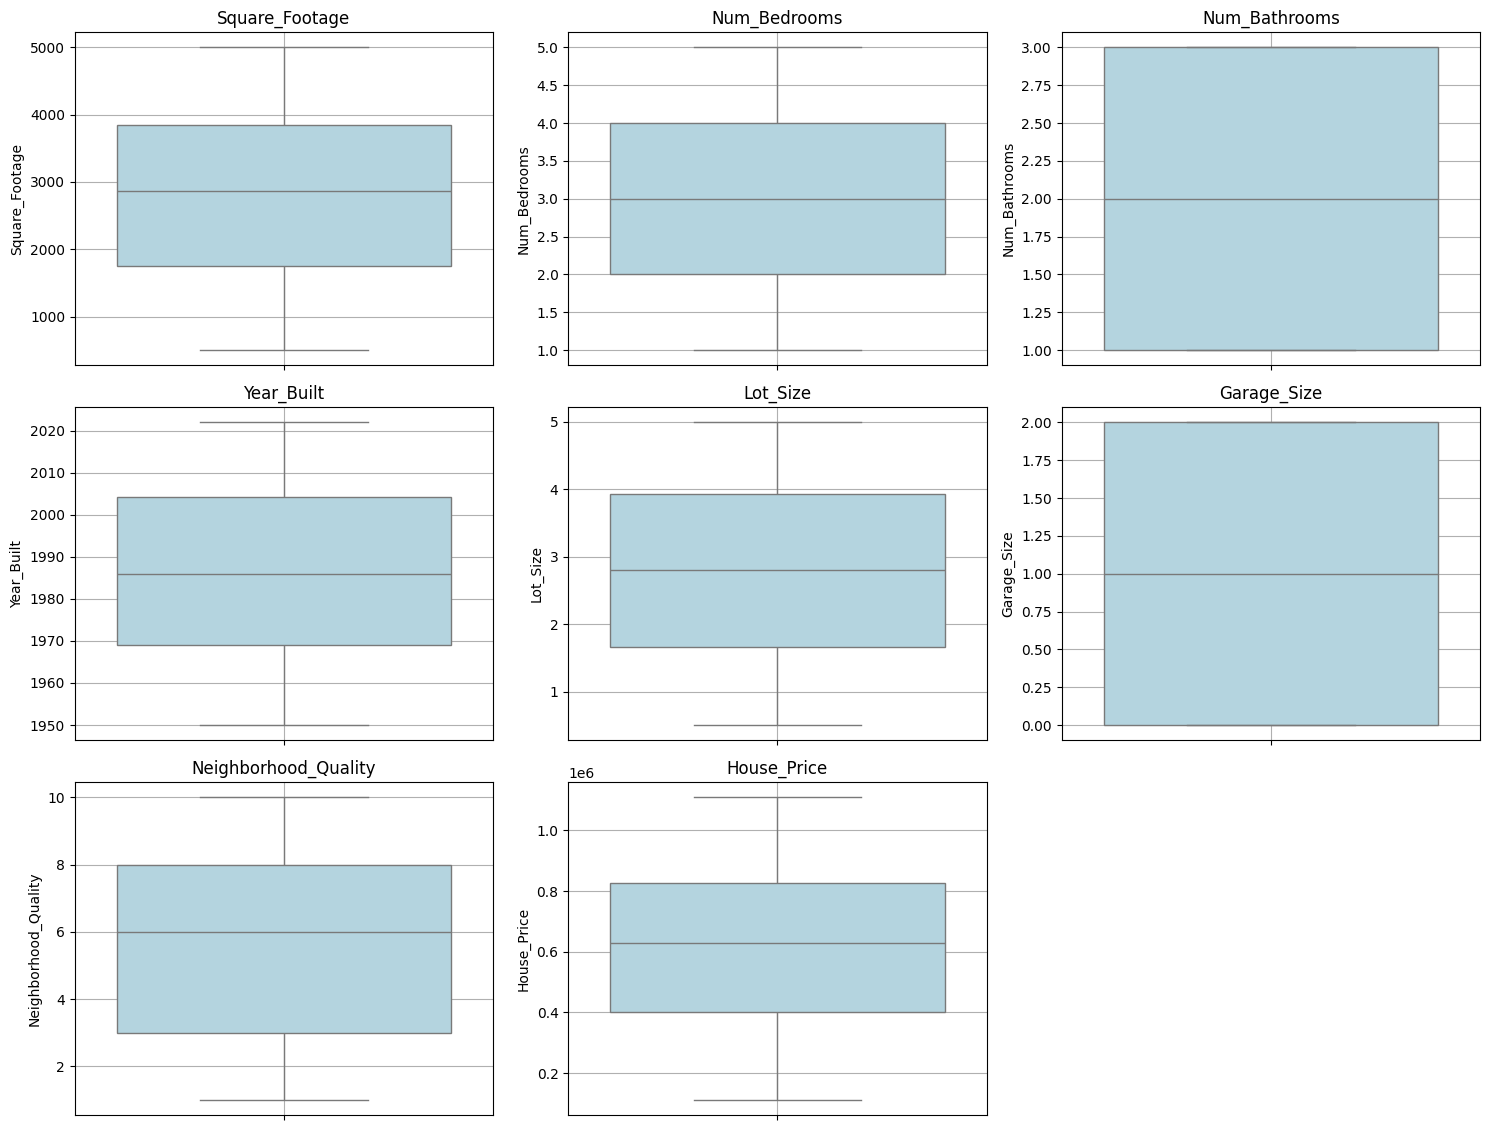

In [11]:
# Defining the number of columns for the subplot grid
n_cols = 3

# Calculating the required number of rows based on the number of continuous columns
n_rows = math.ceil(len(numerical_features) / n_cols)

# Creating a grid of subplots with the appropriate number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flattening the 2D array of axes into a 1D array for easier access

# Looping through each continuous column to create boxplots
for i, column in enumerate(numerical_features):
    sns.boxplot(y=df_cleaned[column], ax=axes[i], color='lightblue')  # Creating a boxplot for each continuous column
    axes[i].set_title(column)  # Setting the title for each subplot
    axes[i].set_xlabel("")  # Removing the x-axis label for a cleaner look
    axes[i].grid(True)  # Enabling the grid on each subplot

# Removing any extra axes if there are more subplots than continuous columns
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# Adjusting the layout to ensure the title fits properly and everything looks good
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Displaying the boxplots
plt.show()

In [12]:
# Creating a dictionary to store the IQR bounds for each numerical_features
iqr_bounds = {}

# Looping through each numerical_features to calculate the IQR and bounds
for col in numerical_features:
    # Calculating the first quartile (Q1) and third quartile (Q3)
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)

    # Calculating the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculating the lower and upper bounds for outliers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Storing the bounds in the dictionary
    iqr_bounds[col] = (lower, upper)

# Displaying the IQR bounds for each numerical_features
iqr_bounds

{'Square_Footage': (np.float64(-1400.5), np.float64(6999.5)),
 'Num_Bedrooms': (np.float64(-1.0), np.float64(7.0)),
 'Num_Bathrooms': (np.float64(-2.0), np.float64(6.0)),
 'Year_Built': (np.float64(1916.125), np.float64(2057.125)),
 'Lot_Size': (np.float64(-1.720111744921275), np.float64(7.309374907222705)),
 'Garage_Size': (np.float64(-3.0), np.float64(5.0)),
 'Neighborhood_Quality': (np.float64(-4.5), np.float64(15.5)),
 'House_Price': (np.float64(-236591.34418214735),
  np.float64(1465380.8507282762))}

In [13]:
# Creating a dictionary to store the count of outliers for each continuous column
sum_outliers = {}

# Looping through each column and its IQR bounds to detect and count outliers
for col, (low, high) in iqr_bounds.items():
    # Creating a mask to identify outliers in the dataset (values outside the IQR bounds)
    outlier_mask = (df_cleaned[col] < low) | (df_cleaned[col] > high)

    # Storing the number of outliers in the dictionary
    sum_outliers[col] = outlier_mask.sum()

# Displaying the count of outliers for each continuous column
sum_outliers

{'Square_Footage': np.int64(0),
 'Num_Bedrooms': np.int64(0),
 'Num_Bathrooms': np.int64(0),
 'Year_Built': np.int64(0),
 'Lot_Size': np.int64(0),
 'Garage_Size': np.int64(0),
 'Neighborhood_Quality': np.int64(0),
 'House_Price': np.int64(0)}

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


It can be seen that there are no outliers at all, no duplicate values and also no empty values. That indicates that this dataset has been cleaned very well. So the feature engineering technique is no longer needed.

# Training Data

This section outlines the comprehensive process of preparing the data and training various regression models. It begins with the meticulous preparation of the dataset, where features are distinguished from the target variable, and the data is systematically split into dedicated training and testing sets. A custom Root Mean Squared Error (RMSE) metric is also established to ensure consistent evaluation. Subsequently, different regression models, including Polynomial Regression, Ridge Regression, and Lasso Regression, are systematically trained and evaluated. For each model, pipelines are constructed to streamline the workflow, incorporating necessary steps such as feature transformation and scaling. Hyperparameter tuning is also performed using GridSearchCV and RidgeCV/LassoCV to identify the optimal parameters that yield the best performance for each model. The performance of each model is rigorously assessed and reported using RMSE and best-found hyperparameters.

## Data preparatioan

In this subsection, the dataset is prepared for model training. The features (X) are defined by dropping the 'House_Price' column from the df_cleaned DataFrame, and the target variable (y) is set as the 'House_Price' column. The data is then split into training and testing sets, with 70% of the data allocated for training and 30% for testing. A random_state is set to 42 to ensure reproducibility of the split. The number of samples in both the test and training sets are then printed. Finally, a custom Root Mean Squared Error (RMSE) function is defined, which calculates the square root of the mean squared error between true and predicted values, and an RMSE scorer is created for model evaluation, where a lower value is considered better.

In [15]:
X = df_cleaned.drop('House_Price', axis=1)  # Features: all columns except 'House_Price'
y = df_cleaned['House_Price']  # Target variable: the column to predict


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Splits the dataset into 70% training and 30% testing data with a fixed random state for reproducibility

print("Number of test samples:", X_test.shape[0])  # Print number of test samples
print("Number of training samples:", X_train.shape[0])  # Print number of training samples


Number of test samples: 300
Number of training samples: 700


In [17]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))  # Calculates Root Mean Squared Error

rmse_scorer = make_scorer(rmse, greater_is_better=False)  # Custom scorer for model evaluation (lower is better)


## Polynomial Regression

This subsection details the training of a Polynomial Regression model. A pipeline is constructed to chain three sequential steps: generating polynomial features of degree 2 (without including a bias term), standardizing the features using StandardScaler, and finally applying LinearRegression. A grid of polynomial degrees (1, 2, and 3) is defined for hyperparameter tuning. A GridSearchCV object is then initialized with this pipeline and hyperparameter grid, using 5-fold cross-validation. The GridSearchCV is fitted to the training data. The RMSE on the test set is computed using the best model found by GridSearchCV, and this RMSE value, along with the best parameters identified during the search, are printed.

In [18]:
Input = [
    ('polynomial', PolynomialFeatures(include_bias=False, degree=2)),  # Generate polynomial features (degree 2)
    ('scaler', StandardScaler()),  # Standardize the features
    ('model', LinearRegression())  # Apply linear regression
]

pipe = Pipeline(Input)  # Create a pipeline to chain transformations and modeling


In [19]:
param_grid = {
    "polynomial__degree": [1, 2, 3]  # Grid of polynomial degrees to try during model tuning
}


In [20]:
polynomial = GridSearchCV(
    estimator=pipe,          # Pipeline with polynomial features, scaler, and linear regression
    param_grid=param_grid,   # Hyperparameter grid to search (polynomial degrees)
    cv=5                     # 5-fold cross-validation
)



In [21]:
polynomial.fit(X_train, y_train)  # Train the GridSearchCV pipeline on the training data


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'polynomial__degree': [1, 2, 3]})

In [22]:
polynomial_rmse = rmse(y_test, polynomial.predict(X_test))  # Compute RMSE on test set using best model
print("RMSE:", polynomial_rmse)
print("Best parameters:", polynomial.best_params_)  #  Use the GridSearchCV object name


RMSE: 10113.409759208345
Best parameters: {'polynomial__degree': 1}


## Ridge Regression

This subsection describes the implementation of a Ridge Regression model. A pipeline is created that first scales the features using StandardScaler and then applies RidgeCV. A list of alpha values (regularization strengths) is provided to RidgeCV for cross-validation, which uses 5-fold cross-validation to select the optimal alpha. The Ridge regression pipeline is fitted to the training data. The RMSE on the test set is calculated using the trained Ridge model, and both the RMSE and the best alpha value selected by RidgeCV are printed.

In [23]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]  # List of alpha values (regularization strengths) to test

ridge = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('ridge', RidgeCV(alphas=alphas, cv=5))  # Ridge regression with cross-validation to select best alpha
])


In [24]:
ridge.fit(X_train, y_train)  # Fit the Ridge regression pipeline on the training data


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 RidgeCV(alphas=[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30,
                                 80],
                         cv=5))])

In [25]:
ridge_rmse = rmse(y_test, ridge.predict(X_test))  # Calculate RMSE on the test set using the Ridge model
print("RMSE:", ridge_rmse)  # Print the prediction error
print("Best alpha:", ridge.named_steps['ridge'].alpha_)  # Print the best regularization strength chosen


RMSE: 10119.213834967033
Best alpha: 0.1


## Lasso Regression

This subsection focuses on the application of a Lasso Regression model. A pipeline is set up, consisting of StandardScaler for feature standardization and LassoCV for Lasso regression. An array of candidate alpha values is provided to LassoCV. The pipeline is trained on the training data, with max_iter set to a large integer to ensure convergence, and 5-fold cross-validation is used. The RMSE on the test data is calculated from the predictions of the trained Lasso model, and this RMSE value, along with the best alpha selected by LassoCV, are printed.

In [26]:
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])  # Candidate alpha values for Lasso regularization

lasso = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('lasso', LassoCV(alphas=alphas2, max_iter=int(5e4), cv=5))  # Lasso regression with cross-validation
])


In [27]:
lasso_rmse = rmse(y_test, lasso.fit(X_train, y_train).predict(X_test))  # Train Lasso and calculate RMSE on test data
print("RMSE:", lasso_rmse)  # Print test error
print("Best alpha:", lasso.named_steps['lasso'].alpha_)  # Print best alpha selected by LassoCV


RMSE: 10113.409759287424
Best alpha: 1e-05


## Evaluation

The performance of the trained regression models was evaluated and visualized. A DataFrame was created to summarize the RMSE values for each model. Comprehensive plots were generated to visually compare actual house prices against predictions from Polynomial, Ridge, and Lasso models, including a single plot with offset lines for clarity and individual subplots for detailed comparison. Finally, scatter plots were created to visualize the relationship between actual and predicted prices for each model.

In [28]:
rmse_vals = [polynomial_rmse, ridge_rmse, lasso_rmse]  # List of RMSE values for each model

labels = ['Linear', 'Ridge', 'Lasso']  # Corresponding model names

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()  # Create DataFrame from RMSE values
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)  # Rename the column to 'RMSE'
rmse_df  # Display the DataFrame


,RMSE
Linear,10113.409759
Ridge,10119.213835
Lasso,10113.409759


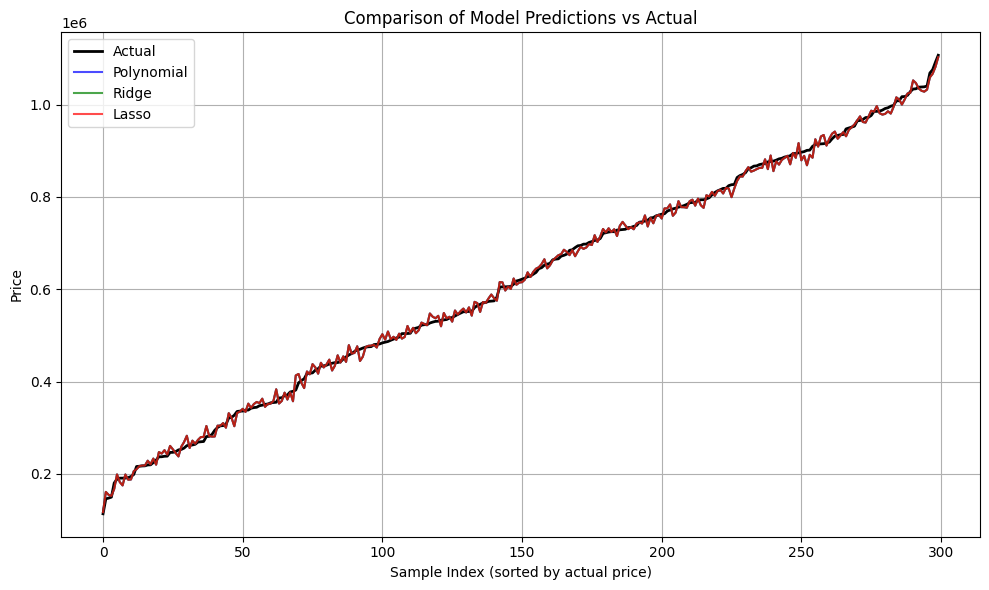

In [29]:
# Sort by actual values (House Prices)
sorted_idx = np.argsort(y_test.values)

# Set up the plot
plt.figure(figsize=(10, 6))
ax = plt.axes()

# Plot actual values
ax.plot(np.arange(len(y_test)), y_test.iloc[sorted_idx],
        label='Actual', color='black', linewidth=2)

# Model labels and predictions
labels = ['Polynomial', 'Ridge', 'Lasso']
models = [polynomial, ridge, lasso]
colors = ['blue', 'green', 'red']

# Plot predictions from each model, with small vertical offsets for clarity
for i, (mod, lab, col) in enumerate(zip(models, labels, colors)):
    y_pred = mod.predict(X_test)
    ax.plot(np.arange(len(y_test)), y_pred[sorted_idx] + i * 10,  # Small offset added
            label=lab, color=col, linewidth=1.5, alpha=0.7)

# Plot formatting
ax.set(
    xlabel='Sample Index (sorted by actual price)',
    ylabel='Price',
    title='Comparison of Model Predictions vs Actual'
)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


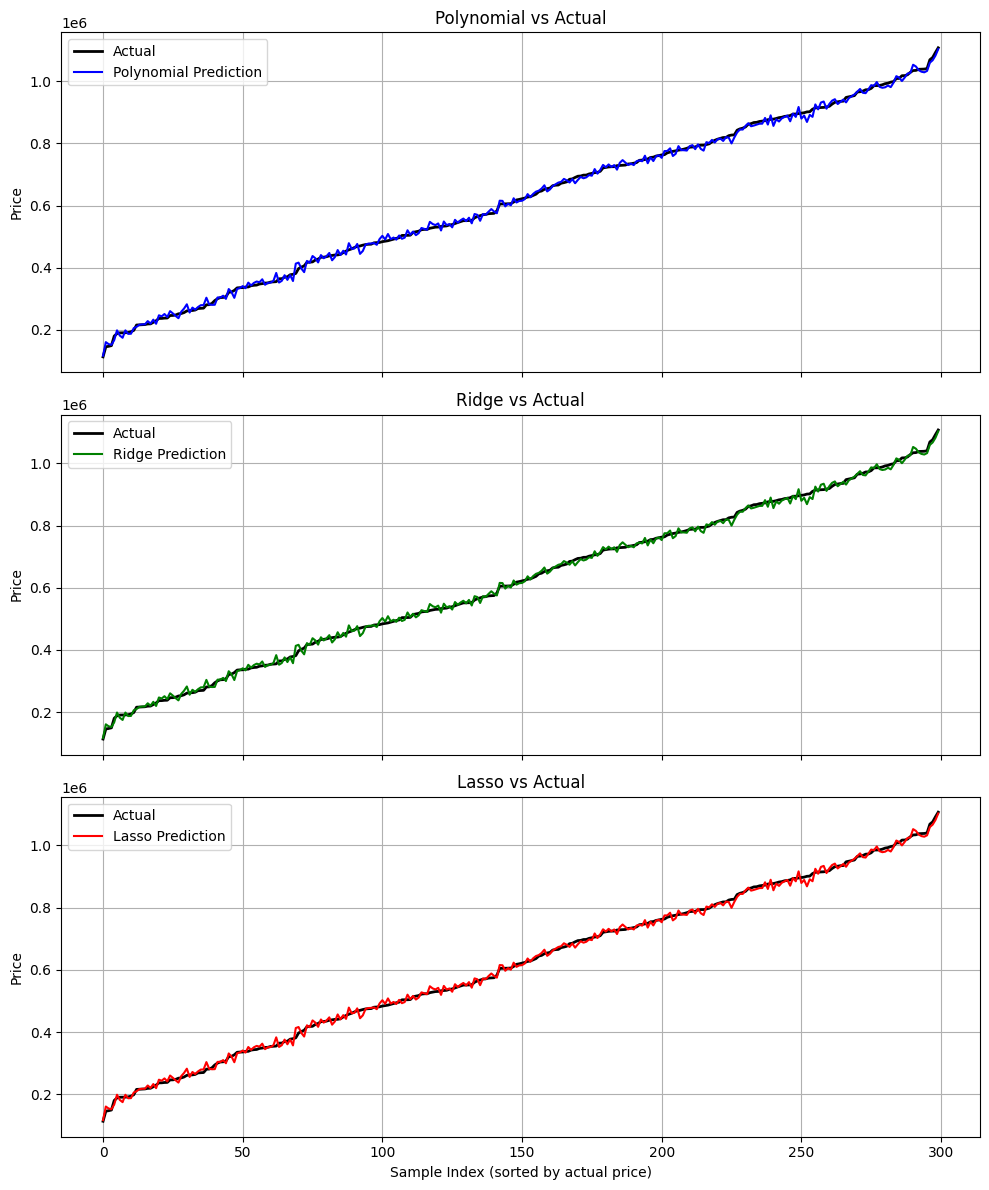

In [30]:
# Sort test set by actual values for cleaner plots
sorted_idx = np.argsort(y_test.values)
y_sorted = y_test.iloc[sorted_idx].values

# Define model labels, objects, and colors
labels = ['Polynomial', 'Ridge', 'Lasso']
models = [polynomial, ridge, lasso]
colors = ['blue', 'green', 'red']

# Create 3 vertically stacked subplots (one for each model)
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

for ax, model, label, color in zip(axs, models, labels, colors):
    y_pred = model.predict(X_test)
    y_pred_sorted = y_pred[sorted_idx]  # Sort predictions to match actuals

    # Plot actual and predicted values
    ax.plot(y_sorted, label='Actual', color='black', linewidth=2)
    ax.plot(y_pred_sorted, label=f'{label} Prediction', color=color, linewidth=1.5)

    ax.set_ylabel('Price')
    ax.set_title(f'{label} vs Actual')
    ax.legend()
    ax.grid(True)

# Label the shared x-axis
axs[-1].set_xlabel('Sample Index (sorted by actual price)')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


[Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price'),
 Text(0.5, 1.0, 'Linear Regression Results')]

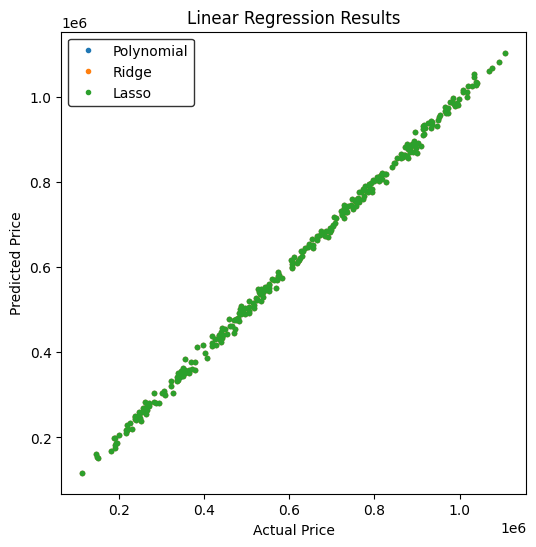

In [31]:
f = plt.figure(figsize=(6,6))  # Create a square figure
ax = plt.axes()  # Create axes object

labels = ['Polynomial', 'Ridge', 'Lasso']  # Model names
models = [polynomial, ridge, lasso]        # Corresponding model objects

# Scatter plot: Actual vs Predicted for each model
for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test),
            marker='o', ls='', ms=3.0, label=lab)  # Marker-only plot

# Style the legend
leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

# Axis labels and title
ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       title='Linear Regression Results')


Based on the provided RMSE values, the Linear and Lasso regression models exhibited almost identical performance, achieving the lowest RMSE of approximately 10113.41. The Ridge regression model showed a slightly higher RMSE of approximately 10119.21. Therefore, it can be concluded that, in terms of prediction accuracy as measured by RMSE, both the Linear and Lasso models performed marginally better than the Ridge model for this dataset.

# Conlusion

Based on the RMSE values, both the Linear and Lasso regression models demonstrated superior and nearly identical performance, achieving the lowest RMSE of approximately 10113.41. The Ridge model, with an RMSE of around 10119.21, showed slightly weaker predictive accuracy. This indicates that for this specific dataset, the simple linear relationship captured by the Linear model, and the feature selection capabilities of the Lasso model, were marginally more effective than the L2 regularization applied by Ridge. Given the dataset's relatively small size of 1000 samples and only 7 independent features, it is noteworthy that consistent and competitive performance was observed across these models, suggesting that the underlying relationships are either fairly straightforward or that the models were effectively tuned to avoid severe overfitting despite the limited data points.

However, the restricted data volume of 1000 samples across only 7 features carries implications for the robustness and generalizability of the conclusions. While the models performed well on the test set derived from this limited data, their ability to generalize to a broader, unseen population might be constrained. The similar performance of Linear and Lasso models further suggests that extensive regularization to handle multicollinearity might not have been a dominant concern with this feature set, or that Lasso's inherent feature sparsity was beneficial. For future applications, especially if deployed in diverse environments, the models developed with such limited data should be continuously monitored, and ideally, their performance should be validated against larger and more varied datasets to ensure their reliability and broad applicability.

# Next Step

For those reviewing or looking to extend this project, several avenues can be explored to further enhance the model's performance and robustness. These include expanding the dataset with more samples and relevant features, conducting deeper advanced feature engineering to derive more predictive variables, and exploring sophisticated modeling techniques such as ensemble methods to capture complex relationships. A more rigorous cross-validation strategy, like repeated K-fold cross-validation, is also recommended to provide more stable performance estimates given the dataset's relatively small size. It is advised that conclusions drawn from the current RMSE values be considered within the context of the limited data, as the models' ability to generalize to significantly different or larger datasets may be constrained. Prioritizing data acquisition and feature enrichment is crucial for future iterations, and thorough error analysis, beyond just RMSE, can provide deeper insights for targeted improvements, while emphasizing model interpretability ensures that predictions are understandable and trustworthy.

# © 2025 Goder